In [ ]:
# # Run this and then restart the kernel at the start of each session to install
# # 'teotil3' in development mode
# !pip install -e /home/jovyan/projects/teotil3/

In [2]:
import os

import matplotlib.pyplot as plt
import nivapy3 as nivapy
import pandas as pd
import teotil3 as teo
from matplotlib.ticker import MaxNLocator

plt.style.use("ggplot")

In [3]:
# Connect to JupyterHub's PostGIS database
eng = nivapy.da.connect_postgis()

Connection successful.


# TEOTIL3: Hovsfoss/Follum

This notebook contains a quick summary of TEOTIL3 results for the catchment above Hovsfoss (vannforekomst ID `012-3054-R`; see [here](https://vann-nett-klient.miljodirektoratet.no/waterbodies/012-3054-R/factsheet/environmental-status)). See e-mail from Jon Lasse received 10.06.2024.

Jon Lasse is interested in possible effects of discharges from Follum Fabrikker, just downstream. This corresponds to regine `012.F12`.

## 1. Data summary

There is not much observed data from this area. The current WFD status for TOTN and TOTP in Vann-Nett for vannforekomst `012-3054-R` is based on just 8 samples collected in 2004 from station `012-28952`. According to [Norske Utslipp](https://www.norskeutslipp.no/no/Diverse/Virksomhet/?CompanyID=5282), the sawmill at Follum ("Norske Skogindustrier ASA, Follum Fabrikker") used to discharge around 40 to 100 tones of TOTN and 1 to 3 tonnes of TOTP per year, but it closed down in 2012 and hasn't discharged since. 

## 2. User input

In [4]:
# Vannmiljø params
vm_st_yr = 2000
vm_end_yr = 2023
vm_stn_ids = [
    "012-28952",
]
vm_par_ids = ["P-TOT", "N-TOT"]

# TEOTIL3 params
reg_id = "012.F12"
teo3_st_yr = 2013
teo3_end_yr = 2022
totp_ges_ugpl = 17
totn_ges_ugpl = 475
nve_data_year = 2023
admin_year = 2022

# TEOTIL2 pars
teo2_reg_id = "012.F12"
teo2_st_yr = 2013
teo2_end_yr = 2022

# Vann-nett params
# https://vann-nett-klient.miljodirektoratet.no/waterbodies/012-3054-R/factsheet/environmental-status
vn_st_yr = 2004
vn_end_yr = 2005
totn_ugpl = 308
totp_ugpl = 6

## 3. TEOTIL modelling

### 3.1. Read model results

In [5]:
# Get regines
reg_gdf = teo.io.get_regine_geodataframe(eng, admin_year)

# Read single input file and build network
data_fold = r"/home/jovyan/shared/common/teotil3/annual_input_data"
csv_path = os.path.join(
    data_fold,
    f"teotil3_input_data_nve{nve_data_year}_2013.csv",
)
in_df = pd.read_csv(csv_path)
g = teo.model.build_graph(in_df, id_col="regine", next_down_col="regine_down")

# Read model results
eval_fold = r"/home/jovyan/shared/common/teotil3/evaluation"
mod_csv = os.path.join(eval_fold, f"teo3_results_nve{nve_data_year}_2013-2022.csv")
mod_df = pd.read_csv(mod_csv)

mod_df.head()

,regine,regine_down,accum_agriculture-background_din_kg,accum_agriculture-background_ss_kg,accum_agriculture-background_tdp_kg,accum_agriculture-background_toc_kg,accum_agriculture-background_ton_kg,accum_agriculture-background_totn_kg,accum_agriculture-background_totp_kg,accum_agriculture-background_tpp_kg,...,local_urban_tpp_kg,local_wood_din_kg,local_wood_ss_kg,local_wood_tdp_kg,local_wood_toc_kg,local_wood_ton_kg,local_wood_totn_kg,local_wood_totp_kg,local_wood_tpp_kg,year
0,001.10,001.,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,36.1,849.2,0.6,9938.9,186.2,222.3,5.4,4.8,2013
1,001.1A2B,001.1A2A,123.574401,0.752367,3.420677,6341.957239,68.505729,192.080130,3.609359,0.188682,...,5.6,1318.1,29798.4,23.9,384175.8,7138.8,8456.9,210.0,186.1,2013
2,001.1A4D,001.1A4C,15.917595,0.289332,0.117126,464.712746,6.729665,22.647261,0.149627,0.032501,...,0.0,237.2,5272.5,4.3,70016.3,1296.4,1533.6,38.2,33.9,2013
3,001.1M,001.1L,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,473.5,11104.0,8.8,142788.5,2641.6,3115.1,78.3,69.5,2013
4,001.21,001.,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,5.0,117.0,0.1,1386.1,25.9,30.9,0.8,0.7,2013


### 3.2. Plot catchment and results

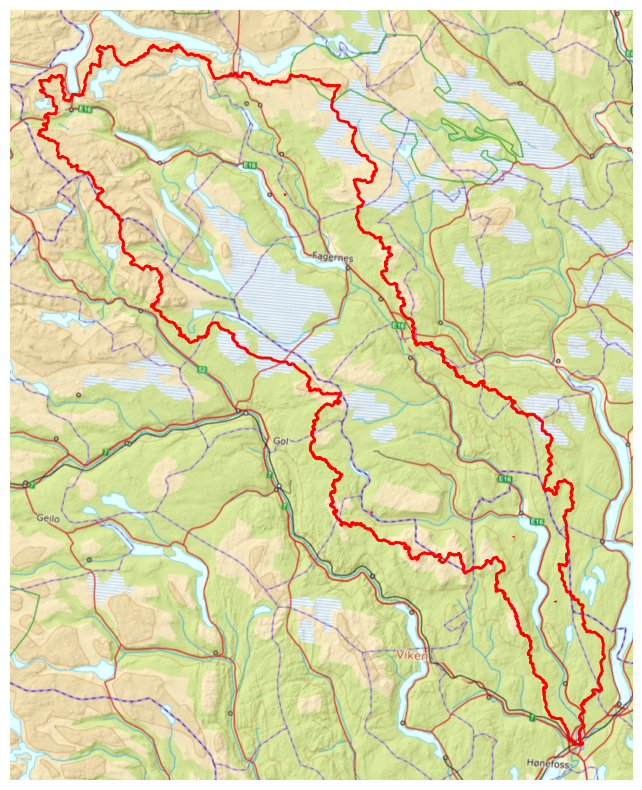

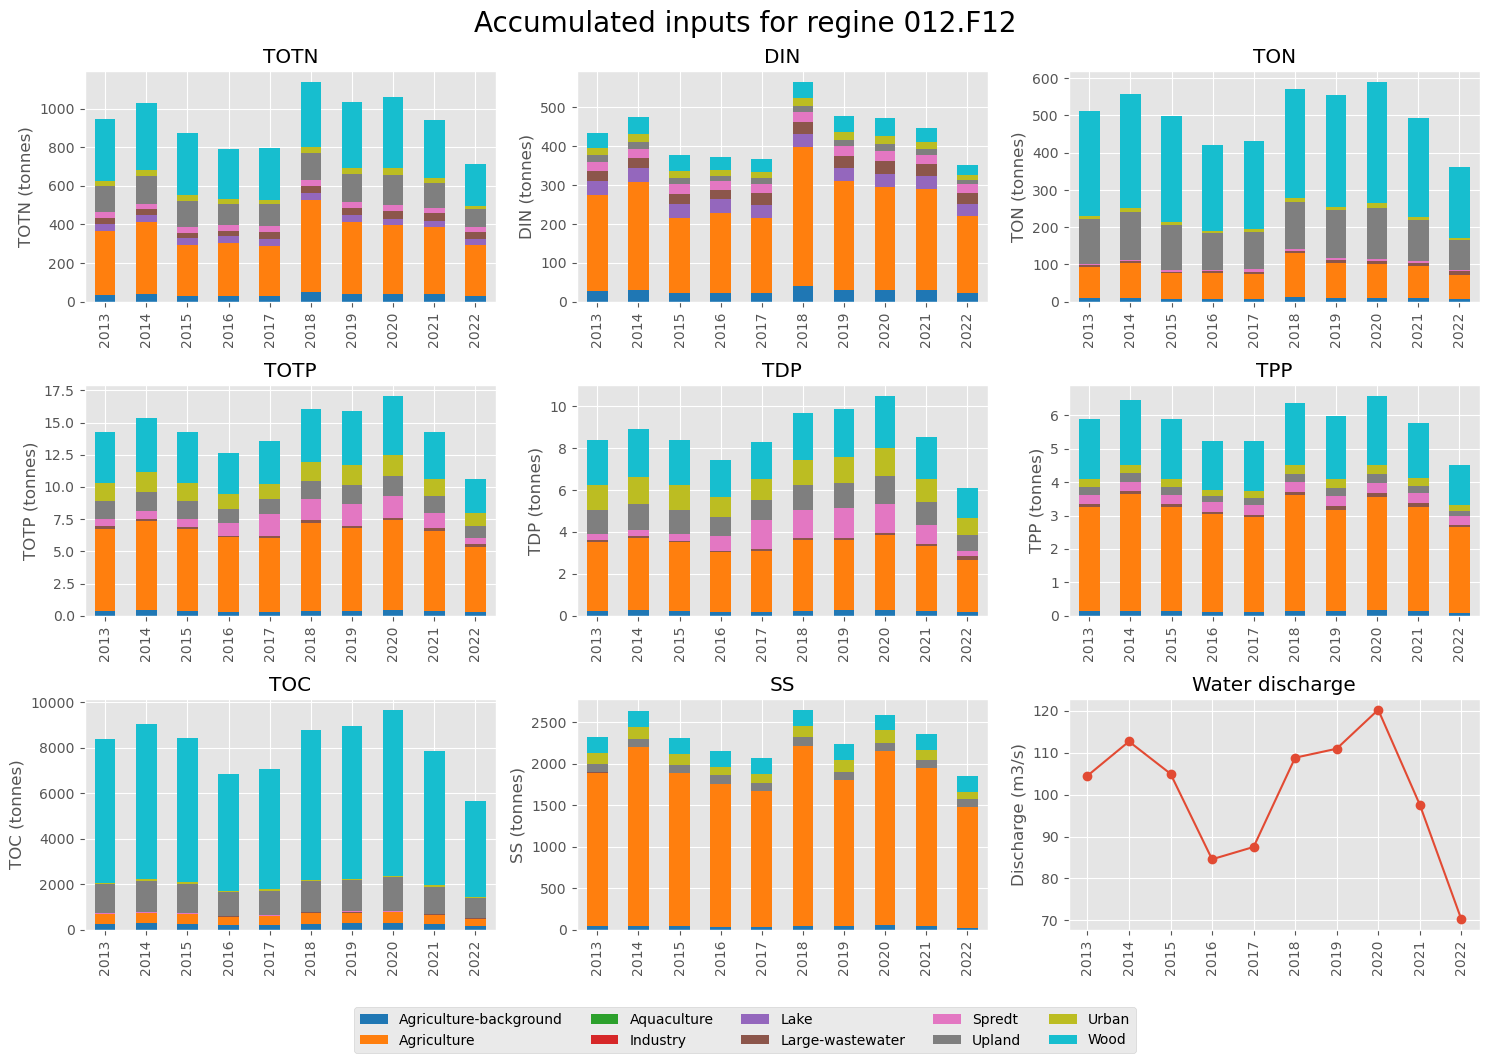

In [6]:
# Plot regine and all contributing regines upstream
gdf, ax = teo.vis.plot_catchment(
    g, reg_id, reg_gdf, id_col="regine", include_connected=True, direct="up"
)
axes = teo.vis.plot_regine_barchart(reg_id, mod_df, stat="accum", index_col="year")

### 3.3. Avlastningsbehov

In [7]:
totp_res_dict = teo.model.get_avlastningsbehov(
    reg_id,
    "TOTP",
    totp_ges_ugpl,
    mod_df,
    st_yr=teo3_st_yr,
    end_yr=teo3_end_yr,
    index_col="year",
)

Selected regine:	012.F12.
Selected parameter:	TOTP.
Time period:		2013 to 2022.
Concentration for GES:	17 ug/l.

The regine contains 0 lake(s):
	vatnLnrs:	[]

Estimated mean outflow concentration(s) (2013-2022):
	TOTP (ug/l)                          4.6
	TDP (ug/l)                           2.7
	TPP (ug/l)                           1.8

Estimated mean annual outflow flux(es) (2013-2022):
	TOTP (kg)                          14392
	TDP (kg)                            8599
	TPP (kg)                            5792

Source apportionment for outflow TOTP:
	Agriculture (%)                     43.6
	Wood (%)                            26.2
	Urban (%)                            9.4
	Upland (%)                           9.2
	Spredt (%)                           7.8
	Agriculture-background (%)           2.5
	Large-wastewater (%)                 1.2

Maximum outflow flux for GES (kg/yr)	   53773
Transmission factor (weighted) for TOTP     1.00
Maximum inflow flux for GES (kg/yr)	   53773
Estimate

In [8]:
totn_res_dict = teo.model.get_avlastningsbehov(
    reg_id,
    "TOTN",
    totn_ges_ugpl,
    mod_df,
    st_yr=teo3_st_yr,
    end_yr=teo3_end_yr,
    index_col="year",
)

Selected regine:	012.F12.
Selected parameter:	TOTN.
Time period:		2013 to 2022.
Concentration for GES:	475 ug/l.

The regine contains 0 lake(s):
	vatnLnrs:	[]

Estimated mean outflow concentration(s) (2013-2022):
	TOTN (ug/l)                        296.1
	DIN (ug/l)                         138.2
	TON (ug/l)                         157.9

Estimated mean annual outflow flux(es) (2013-2022):
	TOTN (kg)                         933317
	DIN (kg)                          434345
	TON (kg)                          498971

Source apportionment for outflow TOTN:
	Agriculture (%)                     35.5
	Wood (%)                            33.1
	Upland (%)                          14.0
	Agriculture-background (%)           3.9
	Large-wastewater (%)                 3.7
	Lake (%)                             3.6
	Spredt (%)                           3.2
	Urban (%)                            2.9

Maximum outflow flux for GES (kg/yr)	 1502494
Transmission factor (weighted) for TOTN     1.00
Maximum in

### 3.4. TEOTIL2 results

In [9]:
df_list = []
for year in range(teo2_st_yr, teo2_end_yr + 1):
    url = f"https://raw.githubusercontent.com/NIVANorge/teotil2/main/data/norway_annual_output_data/teotil2_results_{year}.csv"
    teo2_df = pd.read_csv(url).query("regine == @teo2_reg_id")[
        [
            "accum_all_sources_tot-n_tonnes",
            "accum_all_sources_tot-p_tonnes",
            "accum_q_m3/s",
        ]
    ]
    if len(teo2_df) != 1:
        print(f"WARNING: TEOTIL2 data not found for '{reg_id}' in {year}.")
        continue
    teo2_df["year"] = year
    df_list.append(teo2_df)

teo2_df = pd.concat(df_list, axis="rows")
teo2_df["TOTN_ug/l"] = (
    teo2_df["accum_all_sources_tot-n_tonnes"]
    * 1e12
    / (teo2_df["accum_q_m3/s"] * 60 * 60 * 24 * 365.25 * 1000)
)
teo2_df["TOTP_ug/l"] = (
    teo2_df["accum_all_sources_tot-p_tonnes"]
    * 1e12
    / (teo2_df["accum_q_m3/s"] * 60 * 60 * 24 * 365.25 * 1000)
)
teo2_df = teo2_df.set_index("year")[["TOTN_ug/l", "TOTP_ug/l"]]
teo2_df.mean()

TOTN_ug/l    210.590328
TOTP_ug/l      2.295860
dtype: float64

## 4. Observed data

### 4.1. Discharge from NVE

The nearest NVE station with discharge monitoring is 12.15.0 ([Strømstøa](https://sildre.nve.no/station/12.15.0?12.15.0_tab=1)). The code below gets data from this station and scales the values to match the catchment area above regine `012.F12`.

The observed data are a good match to the simulated values in TEOTIL3 (see lower-right plot above).

/tmp/ipykernel_1675/3557178616.py:12: FutureWarning: 'A' is deprecated and will be removed in a future version, please use 'YE' instead.
  q_df = q_df.set_index("datetime")[["value"]].resample("A").mean()


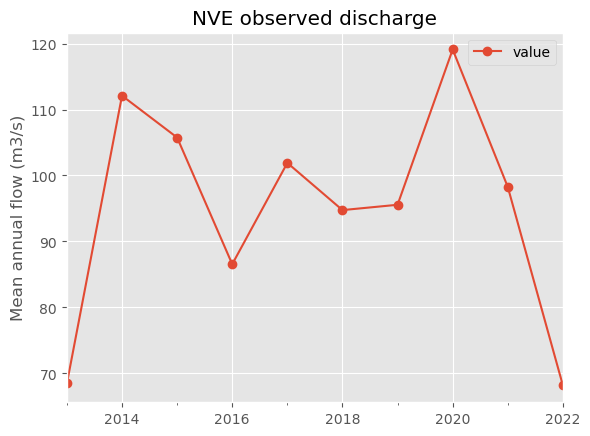

In [10]:
nve_ids = ["12.15.0"]
par_ids = [1001]
nve_st_dt = "2000-01-01"
nve_end_dt = "2023-01-01"
a_nve_cat_km2 = 4649.8
a_chem_cat_km2 = mod_df.query("regine == @reg_id")["accum_upstr_area_km2"].mean()

q_df = nivapy.da.query_nve_hydapi(
    nve_ids, par_ids, nve_st_dt, nve_end_dt, resolution=1440
)
q_df["value"] = q_df["value"] * a_chem_cat_km2 / a_nve_cat_km2
q_df = q_df.set_index("datetime")[["value"]].resample("A").mean()
q_df.plot(marker="o")
plt.title("NVE observed discharge")
plt.xlabel('')
plt.ylabel('Mean annual flow (m3/s)');

### 4.2. Water chemsitry from Vannmiljø

In [11]:
# Query results from VM API
data = {
    "FromDateSamplingTime": f"{vm_st_yr}-01-01",
    "ToDateSamplingTime": f"{vm_end_yr}-12-31",
    "FromRegDate": "1900-01-01",
    "WaterLocationCodeFilter": vm_stn_ids,
}
obs_df = nivapy.da.post_data_to_vannmiljo("GetRegistrations", data=data)
obs_df = obs_df.query("ParameterID in @vm_par_ids")
obs_df["SamplingTime"] = pd.to_datetime(obs_df["SamplingTime"])
obs_df["Year"] = obs_df["SamplingTime"].dt.year
cols = [
    "WaterLocationCode",
    "Name",
    "ActivityID",
    "MediumID",
    "SamplingTime",
    "Year",
    "ParameterID",
    "UpperDepth",
    "LowerDepth",
    "ValueOperator",
    "RegValue",
    "Unit",
]
obs_df = obs_df[cols]
obs_df.head()

,WaterLocationCode,Name,ActivityID,MediumID,SamplingTime,Year,ParameterID,UpperDepth,LowerDepth,ValueOperator,RegValue,Unit
0,012-28952,Begna v/Hønefossen,ANNE,VF,2004-09-29,2004,N-TOT,1.0,1.0,=,270.0,µg/l N
1,012-28952,Begna v/Hønefossen,ANNE,VF,2004-06-30,2004,N-TOT,1.0,1.0,=,270.0,µg/l N
2,012-28952,Begna v/Hønefossen,ANNE,VF,2004-10-26,2004,N-TOT,1.0,1.0,=,310.0,µg/l N
3,012-28952,Begna v/Hønefossen,ANNE,VF,2004-09-01,2004,N-TOT,1.0,1.0,=,310.0,µg/l N
4,012-28952,Begna v/Hønefossen,ANNE,VF,2004-12-15,2004,N-TOT,1.0,1.0,=,320.0,µg/l N


In [12]:
obs_df.groupby(["Year", "ParameterID"]).count()

WaterLocationCode  Name  ActivityID  MediumID  SamplingTime  \
Year ParameterID                                                                
2004 N-TOT                        8     8           8         8             8   
     P-TOT                        8     8           8         8             8   

                  UpperDepth  LowerDepth  ValueOperator  RegValue  Unit  
Year ParameterID                                                         
2004 N-TOT                 8           8              8         8     8  
     P-TOT                 8           8              8         8     8

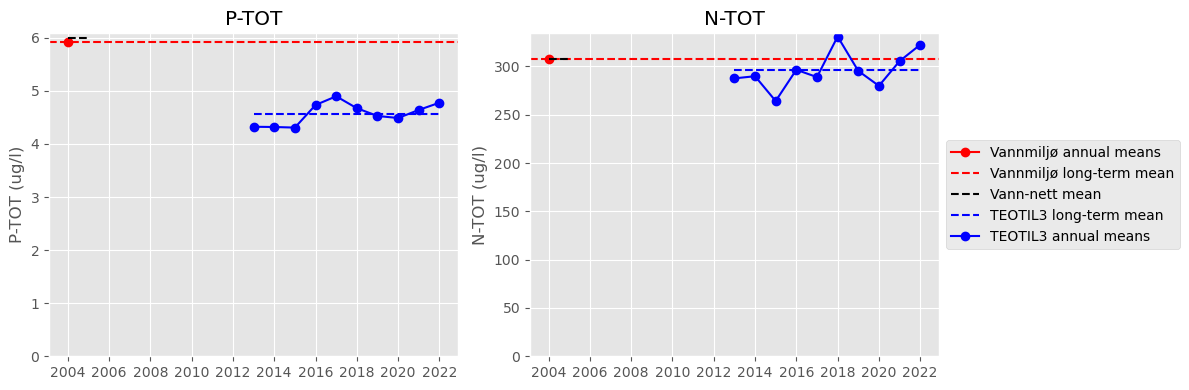

In [13]:
# Plot
df = obs_df.groupby(["ParameterID", "Year"])["RegValue"].mean().reset_index()
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 4))
for idx, par in enumerate(vm_par_ids):
    par_df = df.query("ParameterID == @par").sort_values("Year")
    obs_mean = par_df["RegValue"].mean()
    axes[idx].plot(
        par_df["Year"], par_df["RegValue"], "ro-", label="Vannmiljø annual means"
    )
    axes[idx].axhline(obs_mean, ls="--", c="r", label="Vannmiljø long-term mean")
    if par == "N-TOT":
        teo_mean = totn_res_dict["conc_df"]["TOTN_ug/l"].mean()
        teo2_mean = teo2_df["TOTN_ug/l"].mean()
        axes[idx].plot(
            [vn_st_yr, vn_end_yr], [totn_ugpl, totn_ugpl], "k--", label="Vann-nett mean"
        )
        # axes[idx].plot(
        #     [teo2_st_yr, teo2_end_yr],
        #     [teo2_mean, teo2_mean],
        #     "g--",
        #     label="TEOTIL2 long-term mean",
        # )
        axes[idx].plot(
            [teo3_st_yr, teo3_end_yr],
            [teo_mean, teo_mean],
            "b--",
            label="TEOTIL3 long-term mean",
        )
        totn_res_dict["conc_df"][["TOTN_ug/l"]].plot(
            ax=axes[idx],
            legend=False,
            marker="o",
            c="b",
        )
        axes[idx].lines[-1].set_label("TEOTIL3 annual means")
        # teo2_df["TOTN_ug/l"].plot(
        #     ax=axes[idx],
        #     legend=False,
        #     marker="o",
        #     c="g",
        # )
        # axes[idx].lines[-1].set_label("TEOTIL2 annual means")
    else:
        teo_mean = totp_res_dict["conc_df"]["TOTP_ug/l"].mean()
        teo2_mean = teo2_df["TOTP_ug/l"].mean()
        axes[idx].plot(
            [vn_st_yr, vn_end_yr], [totp_ugpl, totp_ugpl], "k--", label="Vann-nett mean"
        )
        # axes[idx].plot(
        #     [teo2_st_yr, teo2_end_yr],
        #     [teo2_mean, teo2_mean],
        #     "g--",
        #     label="TEOTIL2 long-term mean",
        # )
        axes[idx].plot(
            [teo3_st_yr, teo3_end_yr],
            [teo_mean, teo_mean],
            "b--",
            label="TEOTIL3 long-term mean",
        )
        totp_res_dict["conc_df"][["TOTP_ug/l"]].plot(
            ax=axes[idx],
            legend=False,
            marker="o",
            c="b",
        )
        axes[idx].lines[-1].set_label("TEOTIL3 annual means")
        # teo2_df["TOTP_ug/l"].plot(
        #     ax=axes[idx],
        #     legend=False,
        #     marker="o",
        #     c="g",
        # )
        # axes[idx].lines[-1].set_label("TEOTIL2 annual means")
    axes[idx].set_title(par)
    axes[idx].set_xlabel("")
    axes[idx].set_ylabel(f"{par} (ug/l)")
    axes[idx].xaxis.set_major_locator(MaxNLocator(integer=True))
    axes[idx].set_ylim(ymin=0)
axes[1].legend(loc="center left", bbox_to_anchor=(1, 0.5))
plt.tight_layout()

## 5. Summary

